### Pytorch basics

In [1]:
import torch
torch.__version__

'2.0.1'

In [2]:
### Empty tensors

# x = torch.empty(2)
# x = torch.empty(2,8,3)
x = torch.empty(5,5)
# x = torch.empty(2,2,3)
print(x)
print(x.shape)

tensor([[8.4490e-39, 9.9184e-39, 9.9184e-39, 9.0000e-39, 1.0561e-38],
        [1.0653e-38, 4.1327e-39, 8.9082e-39, 9.8265e-39, 9.4592e-39],
        [1.0561e-38, 1.0653e-38, 1.0469e-38, 9.5510e-39, 9.3673e-39],
        [8.4490e-39, 1.1020e-38, 9.2755e-39, 9.6429e-39, 9.2755e-39],
        [1.0653e-38, 9.9184e-39, 9.0918e-39, 1.0102e-38, 1.0653e-38]])
torch.Size([5, 5])


In [3]:
### Random tensors

# x = torch.rand(2)
# x = torch.rand(2,8,3)
# x = torch.rand(5,5)
x = torch.rand(2,2,3)
print(x)
print(x.shape)

tensor([[[0.1677, 0.8664, 0.9935],
         [0.9404, 0.2245, 0.4374]],

        [[0.2314, 0.9641, 0.2533],
         [0.0452, 0.3903, 0.4148]]])
torch.Size([2, 2, 3])


In [4]:
# x = torch.zeros(2)
# x = torch.ones(2,8,3)
# x = 5*torch.ones(5,5)
x = torch.tensor([2.5, 0.1])
print(x)

tensor([2.5000, 0.1000])


### Elemen-wise operations

In [5]:
### Addition

x = torch.rand(2,2)
y = torch.rand(2,2)
z = torch.add(x,y) ## ==> x+y
# y.add_(x)          ### ubdate y by adding x

print("x tessor is:\n ", x)
print("y tessor is:\n ", y)
print("z tessor is:\n ", z)

x tessor is:
  tensor([[0.7259, 0.9967],
        [0.4883, 0.7956]])
y tessor is:
  tensor([[0.4686, 0.9926],
        [0.1256, 0.1529]])
z tessor is:
  tensor([[1.1945, 1.9893],
        [0.6140, 0.9485]])


In [6]:
### Substuction

x = torch.rand(2,2)
y = torch.rand(2,2)
z = torch.sub(x,y) ## ==> x-y
# y.sub_(x)          ### ubdate y by substracting x

print("x tessor is:\n ", x)
print("y tessor is:\n ", y)
print("z tessor is:\n ", z)

x tessor is:
  tensor([[0.0905, 0.5023],
        [0.0566, 0.1592]])
y tessor is:
  tensor([[0.9576, 0.2075],
        [0.2420, 0.8210]])
z tessor is:
  tensor([[-0.8671,  0.2948],
        [-0.1854, -0.6618]])


In [7]:
### Multiplication

x = torch.rand(2,2)
y = torch.rand(2,2)
z = torch.mul(x,y) ## ==> x*y
# y.mul_(x)          ### ubdate y by multiplaying x

print("x tessor is:\n ", x)
print("y tessor is:\n ", y)
print("z tessor is:\n ", z)

x tessor is:
  tensor([[0.8375, 0.9910],
        [0.3757, 0.6634]])
y tessor is:
  tensor([[0.5615, 0.4979],
        [0.3670, 0.6253]])
z tessor is:
  tensor([[0.4703, 0.4935],
        [0.1379, 0.4148]])


In [8]:
### Division
x = torch.rand(2,2)
y = torch.rand(2,2)
z = torch.div(x,y) ## ==> x/y
# y.div_(x)          ### ubdate y by dividing x ==> y = y/x

print("x tessor is:\n ", x)
print("y tessor is:\n ", y)
print("z tessor is:\n ", z)

x tessor is:
  tensor([[0.9370, 0.0454],
        [0.7378, 0.7158]])
y tessor is:
  tensor([[0.5254, 0.7700],
        [0.4104, 0.4707]])
z tessor is:
  tensor([[1.7835, 0.0590],
        [1.7978, 1.5205]])


In [11]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [12]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [14]:
import time
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 0.83329s
GPU time: 0.03786s


### Autograd  Gradient Computation

In [9]:
import torch

x = torch.rand(3, requires_grad=True)
print(x)
y = x+2
print(y)
z = y*y*2
z = z.mean()
print(z)
z.backward()  ## dz/dx
print(x.grad)

tensor([0.2461, 0.1353, 0.4020], requires_grad=True)
tensor([2.2461, 2.1353, 2.4020], grad_fn=<AddBackward0>)
tensor(10.2494, grad_fn=<MeanBackward0>)
tensor([2.9948, 2.8471, 3.2026])


In [10]:
x = torch.rand(3, requires_grad=True)
print(x)
x.requires_grad_(False)
y = x+2
print(y)

tensor([0.4600, 0.0159, 0.8482], requires_grad=True)
tensor([2.4600, 2.0159, 2.8482])


### Model

In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [33]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [34]:
for name, param in model.named_parameters():
    print(f"Parameters {name}, shape {param.shape}")

Parameters linear1.weight, shape torch.Size([4, 2])
Parameters linear1.bias, shape torch.Size([4])
Parameters linear2.weight, shape torch.Size([1, 4])
Parameters linear2.bias, shape torch.Size([1])


### Dataset preparation

In [43]:
import torch.utils.data as data
import torch
import matplotlib.pyplot as plt

In [44]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [45]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.0203, 0.0167]), tensor(0))


In [46]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

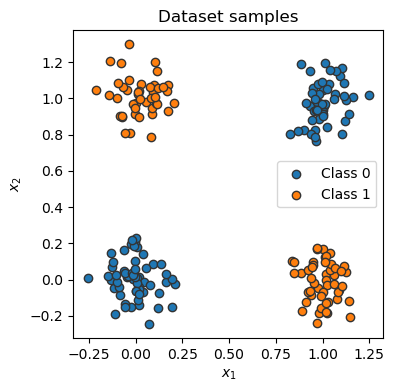

In [47]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [48]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 0.9627,  0.7666],
        [-0.0155,  0.9703],
        [ 1.1152,  1.0133],
        [ 0.9906, -0.1576],
        [ 0.1657,  1.0409],
        [ 1.1653,  1.0094],
        [ 0.0947,  0.0873],
        [ 0.0841,  1.0036]])
Data labels torch.Size([8]) 
 tensor([0, 1, 0, 1, 1, 0, 0, 1])
